In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### EDA

In [2]:
data = pd.read_csv("../Data/raw_analyst_ratings.csv")

Getting basic information

In [3]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
data.shape

(1407328, 6)

In [6]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


Looking for missing values

In [7]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [8]:
# Calculate headline lengths
data['headline_length'] = data['headline'].apply(len)

# Basic statistics for headline lengths
print(data['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts.head())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [10]:
data.stock.unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

In [11]:
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [13]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87


Descriptive Statistics and Time Series Analysis

In [14]:
# headline length
data['headline_length'] = data['headline'].str.len()

In [15]:
summary = data['headline_length'].describe()
print(summary)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [16]:
Articles_per_publisher = data.groupby('publisher').size()
print(Articles_per_publisher)

publisher
47ertrends                       18
AARP                              7
ABNNewswire                      13
Aakin                             5
Aaron Jackson.Ed                 16
                              ...  
vic@forextraininggroup.com        1
vishwanath@benzinga.com        1830
vivek.proactive@gmail.com       120
wallstreet1928                    8
webmaster                     20313
Length: 1034, dtype: int64


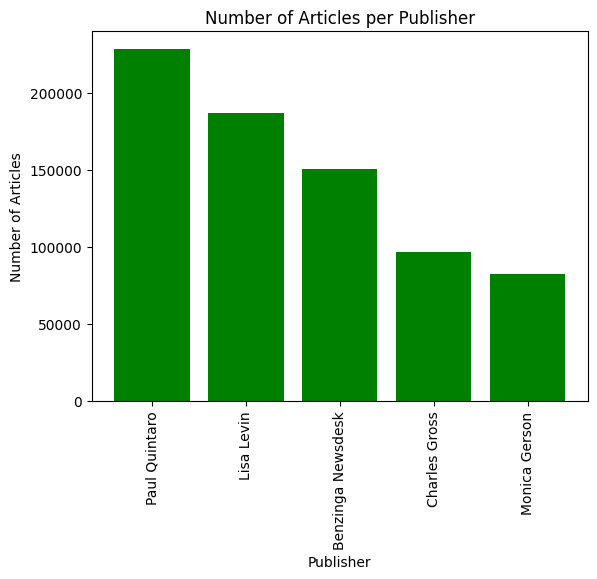

In [17]:
articles_per_publisher = data.groupby('publisher').size().reset_index(name='number_of_articles')
articles_per_publisher = articles_per_publisher.sort_values('number_of_articles', ascending=False)
top_5_publishers = articles_per_publisher.head(5)

# Creating  a bar chart

plt.bar(top_5_publishers['publisher'], top_5_publishers['number_of_articles'], color='green')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Publisher')
plt.xticks(rotation=90)  # Rotates X-axis labels; helpful if they're long
plt.show()

In [21]:
#  publication dates
article_per_date=data.groupby('date').size()
print(article_per_date)


date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


In [22]:

article_per_date.describe()

count    2528.000000
mean       22.146756
std        68.144109
min         1.000000
25%         3.000000
50%         9.000000
75%        17.000000
max       973.000000
dtype: float64

In [23]:
date_with_least_articles = article_per_date.idxmin()
print(date_with_least_articles)

2011-04-27


In [24]:
# which date has the max article
date_with_most_articles = article_per_date.idxmax()
print(date_with_most_articles)

2020-03-12


### Sentiment analysis & Topic Modeling

In [25]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Abdulaziz\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Abdulaziz\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Abdulaziz\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Abdulaziz\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Abdulaziz\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_da

True

In [26]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [27]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [ ]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)

    # Check if the text is positive, neutral, or negative
    if scores['pos'] > scores['neg'] and scores['pos'] > scores['neu']:
        sentiment = 1  # Positive sentiment
    elif scores['neu'] > scores['pos'] and scores['neu'] > scores['neg']:
        sentiment = 0  # Neutral sentiment
    else:
        sentiment = -1  # Negative sentiment

    return sentiment